# Intercom data challenge

by Wenzhe Ding

Goal: Imagine you are an executive producer at a movie studio, and are tasked with picking the genre of your studio’s next movie. Using the dataset of IMDB movie ratings, which genre would you recommend, and why?

In this project, we first conducted descriptive data analysis on the dataset given, then we came up with two metrics to evaluate the popularity and reputation of a movie in cerain genre. Our recommendation was based on the rankings of the two metrics.

In [240]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [241]:
df = pd.read_csv("movies_data.csv")

In [242]:
df.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [243]:
genre = df.iloc[:,-7:].columns.tolist()
print genre

['Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']


There are 7 genres in the dataset.

In [244]:
print sorted(df.year.unique())

[1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005]


The time of movie ranges from 1893 to 2005, which means this dataset is not recent and we could not get any information after 2005.

In [245]:
print len(df)
print len(df.loc[df.budget > 0])
print len(df.loc[df.mpaa > 0])

58788
5183
4924


Since there are over 90% missing values of column "budget" and "mpaa", we excluded these two features for further analysis. We are interested in the distribution of movie rating, length, and number of votes of each movie.

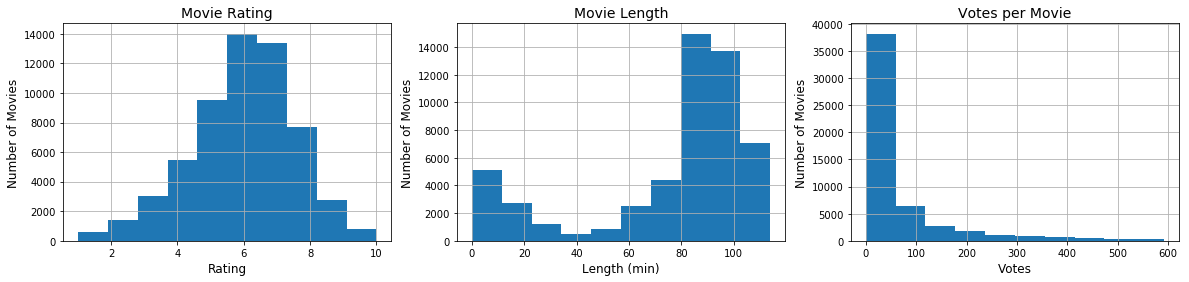

In [246]:
plt.figure(1,figsize=(20,4))
plt.subplot(131)
df.rating.hist()
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Movie Rating', fontsize=14)

plt.subplot(132)
df.length.hist(range=[0,df.length.quantile(.9)])
plt.xlabel('Length (min)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Movie Length', fontsize=14)

plt.subplot(133)
df.votes.hist(range=[0,df.votes.quantile(.9)])
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Votes per Movie', fontsize=14)

The above graph shows that the majority movies have rating between 6 to 7, have length between 80 to 100 minutes, and got less than 50 votes. Interestingly, the patterns of the distribution of each feature varies widely. Movie rating seems to fall along a bell-shaped distribution, while movie length is left-skewed, with the mass of the distribution is concentrated on the right of the figure. In comparision, votes per movie is right-skewed, with a minority of movies have more than 50 votes.

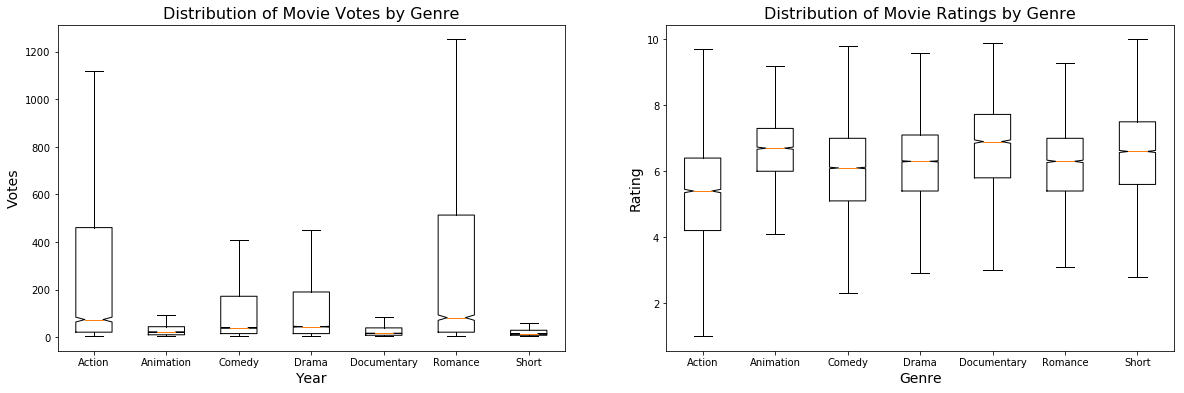

In [271]:
vote_plot = []
genre_plot = []
for g in genre:
    vote_plot.append([df.loc[df[g] == 1]['votes']])
    genre_plot.append([df.loc[df[g] == 1]['rating']])

plt.figure(1,figsize=(20,6))
plt.subplot(121)
plt.boxplot(vote_plot,labels=genre,notch=1, sym='', whis=1.5)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Votes', fontsize=14)
plt.title('Distribution of Movie Votes by Genre', fontsize=16)

plt.subplot(122)
plt.boxplot(genre_plot,labels=genre,notch=1, sym='', whis=1.5)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('Distribution of Movie Ratings by Genre', fontsize=16)

# Descriptive data analysis

### 1. number of movies in each genre

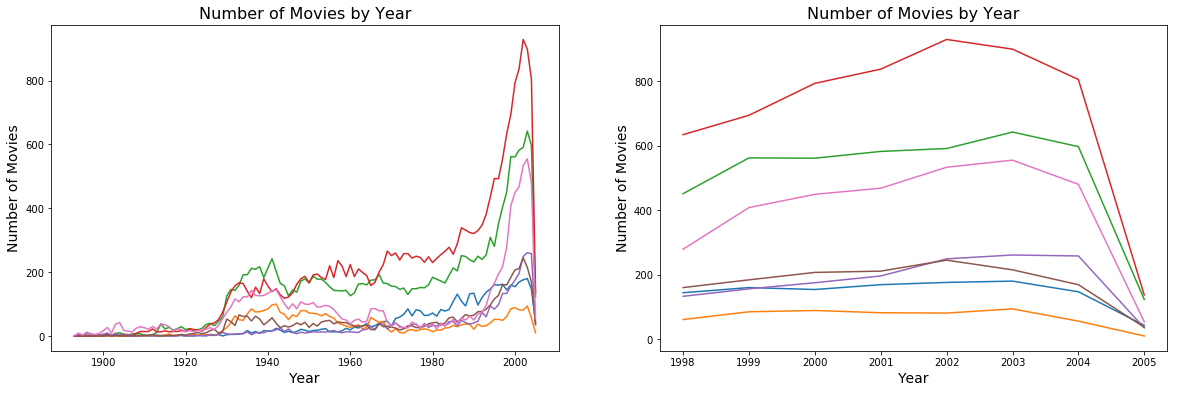

In [248]:
year = df.groupby('year').sum().iloc[:,-7:]
plt.figure(1,figsize=(20,6))

plt.subplot(121)
plt.plot(year)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Number of Movies by Year', fontsize=16)

plt.subplot(122)
plt.plot(year[105:])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Number of Movies by Year', fontsize=16)

### 2. percentage of movies with rating higher than 7 in each genre

In [249]:
higher = df.loc[df.rating > 7].groupby('year').sum().iloc[:,-7:]
plt.figure(1,figsize=(20,6))
higher.iloc[95:]

,Action,Animation,Comedy,Drama,Documentary,Romance,Short
year,,,,,,,
1999,13,16,67,125,49,23,82
2000,22,25,115,185,94,53,169
2001,30,34,125,228,100,42,188
2002,37,33,149,292,140,57,249
2003,39,43,187,297,156,46,260
2004,37,26,224,332,168,54,326
2005,12,3,37,51,21,11,49


In [250]:
year.iloc[106:]

,Action,Animation,Comedy,Drama,Documentary,Romance,Short
year,,,,,,,
1999,160,85,562,694,156,184,408
2000,154,89,561,793,175,207,449
2001,169,82,582,837,196,211,468
2002,176,81,591,929,249,245,533
2003,180,94,642,899,261,215,555
2004,147,56,597,805,258,169,480
2005,43,10,123,137,35,37,54


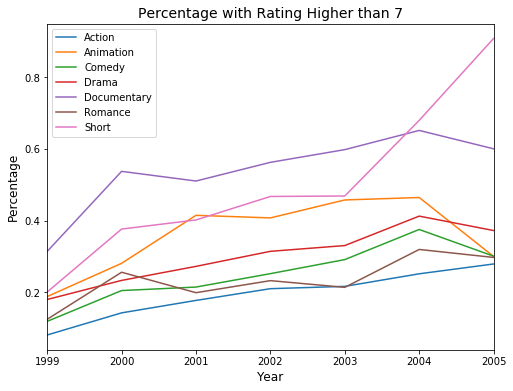

In [251]:
perc = higher.iloc[95:].divide(year.iloc[106:],axis="index")
perc.plot(figsize=(8,6))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage with Rating Higher than 7', fontsize=14)

### 3. relationships between length and rating

In [252]:
recent = df.loc[df.year > 1998]

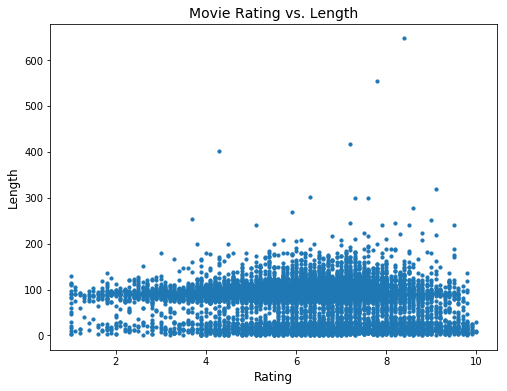

In [253]:
fig, ax = plt.subplots()
recent.plot(ax=ax, kind='scatter', x='rating', y='length', s = 10,figsize=(8,6))
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Length', fontsize=12)
plt.title('Movie Rating vs. Length', fontsize=14)

# 2 metrics to determine the genre of the next movie

### 1. popularity

In [254]:
metric_pop = pd.DataFrame(index=xrange(2000,2006), columns=genre)

for y in xrange(2000,2006):
    res = []
    for g in genre:
        res.append(df.loc[(df.year == y) & (df[g] == 1)]['votes'].mean())
    metric_pop.loc[y] = res

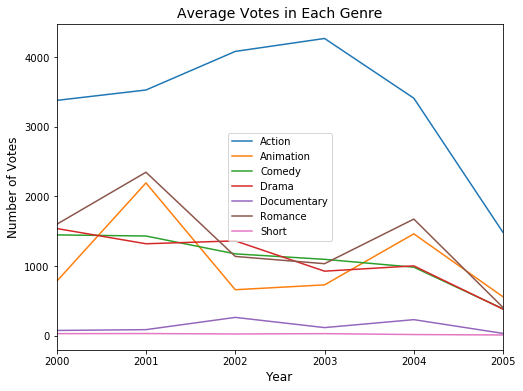

In [255]:
metric_pop.plot(figsize=(8,6))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)
plt.title('Average Votes in Each Genre', fontsize=14)

In [256]:
pop = metric_pop.T
pop['overall'] = pop.mean(axis=1)
pop = pop.sort_values('overall', ascending= False)
pop

,2000,2001,2002,2003,2004,2005,overall
Action,3378.88,3528.1,4082.34,4268.29,3410.7,1481.07,3358.229577
Romance,1599.26,2347.18,1137.76,1033.57,1674.08,403.243,1365.847140
Drama,1538.73,1319.81,1361.48,926.123,1002.27,380.095,1088.084147
Comedy,1447.2,1430.94,1174.83,1096.1,983.29,384.659,1086.167468
Animation,780.315,2193.83,659.481,729.436,1462.14,557,1063.700731
Documentary,74.8171,86.1327,262.237,115.69,229.798,32.2286,133.483903
Short,28.8352,30.2714,24.2402,28.7532,15.9479,9.74074,22.964753


### 2. weighted rating

In [257]:
metric_rating = pd.DataFrame(index=xrange(2000,2006), columns=genre)
df['rating_votes'] =  df.rating * df.votes

for y in xrange(2000,2006):
    r = [] ; v = []
    for g in genre:
        r.append(df.loc[(df.year == y) & (df[g] == 1)]['rating_votes'].sum())
        v.append(df.loc[(df.year == y) & (df[g] == 1)]['votes'].sum())
    res = [m/n for m, n in zip(r, v)]
    metric_rating.loc[y] = res

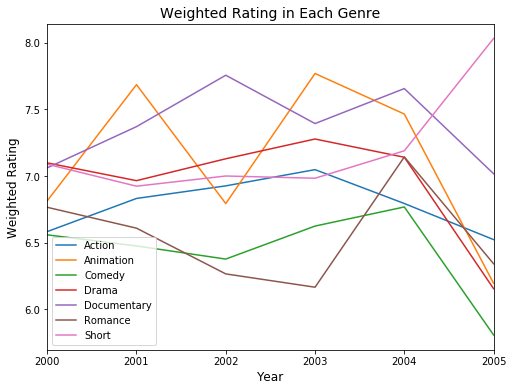

In [258]:
metric_rating.plot(figsize=(8,6))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Weighted Rating', fontsize=12)
plt.title('Weighted Rating in Each Genre', fontsize=14)

In [259]:
rating = metric_rating.T
rating['overall'] = rating.mean(axis=1)
rating = rating.sort_values('overall', ascending= False)
rating

,2000,2001,2002,2003,2004,2005,overall
Documentary,7.06167,7.3711,7.75735,7.39428,7.65705,7.01729,7.376456
Short,7.08919,6.9239,7.00039,6.98366,7.18981,8.03346,7.203402
Animation,6.81352,7.68644,6.79352,7.77031,7.46575,6.1947,7.120707
Drama,7.09896,6.96545,7.12985,7.27827,7.14131,6.15406,6.961315
Action,6.58284,6.83179,6.92632,7.04822,6.79379,6.52279,6.784290
Romance,6.76547,6.60867,6.26513,6.16514,7.14356,6.34115,6.548187
Comedy,6.55852,6.47513,6.37652,6.62437,6.76793,5.8064,6.434813


# Conclusion

* fff

# Limitation